In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import inv
from math import exp
import scipy.io as sio
import numpy as np
from scipy.optimize import curve_fit
data = sio.loadmat('D:\\ML\\[2017]ML_HW3\\[2017]ML_HW3\\Dataset\\Problem1\\2_data.mat')
t = data['t']
x = data['x']

In [2]:
train_t = t[:60]
test_t = t[60:]
train_x = x[:60]
test_x = x[60:]

In [3]:
def kernel1(xn,xm):
    return 1*exp(-2*(xn-xm)**2)

def kernel2(xn,xm):
    return np.dot((xn.transpose()),xm)

def kernel3(xn,xm):
    return 1*exp(-2*(xn-xm)**2)+5*np.dot(xn.transpose(),xm)

def kernel4(xn,xm):
    return 1*exp(-32*(xn-xm)**2)+10

def rms(x,t):
    return np.sqrt(np.mean((x-t)**2))

In [4]:
k1 = []
k2 = []
k3 = []
k4 = []
for i in range(60):
    for j in range(60):
        k1_0 = kernel1(train_x[i],train_x[j])
        k2_0 = kernel2(train_x[i],train_x[j])
        k3_0 = kernel3(train_x[i],train_x[j])
        k4_0 = kernel4(train_x[i],train_x[j])
        k1.append(k1_0)
        k2.append(k2_0)
        k3.append(k3_0)
        k4.append(k4_0)

In [5]:
k1= np.array(k1)
k2= np.array(k2)
k3= np.array(k3)
k4= np.array(k4)
k1= k1.reshape(60,60)
k2= k2.reshape(60,60)
k3= k3.reshape(60,60)
k4= k4.reshape(60,60)

c1 = k1+np.identity(60)
c2 = k2+np.identity(60)
c3 = k3+np.identity(60)
c4 = k4+np.identity(60)

In [6]:
x1 = np.linspace(0,2,50) #0~2
k_new1 = [] #for predict 0~2
k_new2 = [] #for predict 0~2
k_new3 = [] #for predict 0~2
k_new4 = [] #for predict 0~2
for i in range(50):
    for j in range(60):
        k = kernel1(x1[i],train_x[j])
        k_new1.append(k)
        
        k = kernel2(x1[i],train_x[j])
        k_new2.append(k)
        
        k = kernel3(x1[i],train_x[j])
        k_new3.append(k)
        
        k = kernel4(x1[i],train_x[j])
        k_new4.append(k)
        
k_new1= np.array(k_new1)
k_new1= k_new1.reshape(50,60)

k_new2= np.array(k_new2)
k_new2= k_new2.reshape(50,60)

k_new3= np.array(k_new3)
k_new3= k_new3.reshape(50,60)

k_new4= np.array(k_new4)
k_new4= k_new4.reshape(50,60)

In [7]:
m1=[]
m2=[]
m3=[]
m4=[]
sigma1=[]
sigma2=[]
sigma3=[]
sigma4=[]
for i in range(50):
    k_1 = kernel1(x1[i],x1[i])+1     #k(x_n+1,x_n+1)+beta
    k_2 = kernel2(x1[i],x1[i])+1     #k(x_n+1,x_n+1)+beta
    k_3 = kernel3(x1[i],x1[i])+1     #k(x_n+1,x_n+1)+beta
    k_4 = kernel4(x1[i],x1[i])+1     #k(x_n+1,x_n+1)+beta
    
    m=np.dot(np.dot(k_new1[[i]],inv(c1)),train_t)  #kernel1 mean and var
    m1.append(m[0][0])
    sigma = k_1-np.dot(np.dot(k_new1[[i]],inv(c1)),k_new1[[i]].T)
    sigma1.append(sigma[0][0])
    
    m=np.dot(np.dot(k_new2[[i]],inv(c2)),train_t)  #kernel2 mean and var
    m2.append(m[0][0])
    sigma = k_2-np.dot(np.dot(k_new2[[i]],inv(c2)),k_new2[[i]].T)
    sigma2.append(sigma[0][0])
    
    m=np.dot(np.dot(k_new3[[i]],inv(c3)),train_t)  #kernel3 mean and var
    m3.append(m[0][0])
    sigma = k_3-np.dot(np.dot(k_new3[[i]],inv(c3)),k_new3[[i]].T)
    sigma3.append(sigma[0][0])
    
    m=np.dot(np.dot(k_new4[[i]],inv(c4)),train_t)  #kernel4 mean and var
    m4.append(m[0][0])
    sigma = k_4-np.dot(np.dot(k_new4[[i]],inv(c4)),k_new4[[i]].T)
    sigma4.append(sigma[0][0])

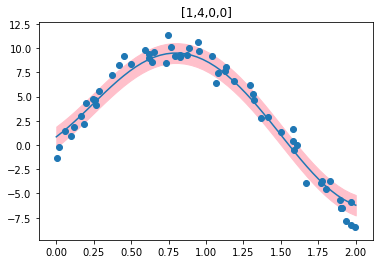

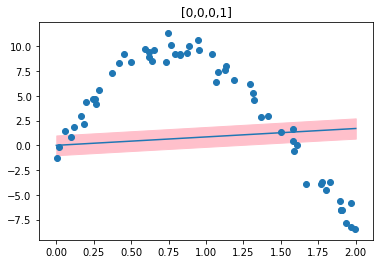

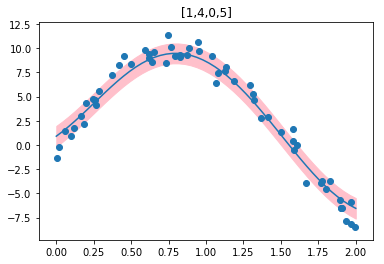

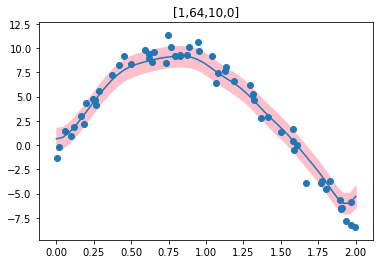

In [8]:
plt.plot(x1,m1) #figure1
plt.fill_between(x1,m1+np.sqrt(sigma1),m1-np.sqrt(sigma1),color='pink')
plt.scatter(train_x,train_t)
plt.title('[1,4,0,0]')
plt.show()
plt.plot(x1,m2) #figure2
plt.fill_between(x1,m2+np.sqrt((sigma2)),m2-np.sqrt((sigma2)),color='pink')
plt.scatter(train_x,train_t)
plt.title('[0,0,0,1]')
plt.show()
plt.plot(x1,m3) #figure3
plt.fill_between(x1,m3+np.sqrt(sigma3),m3-np.sqrt(sigma3),color='pink')
plt.scatter(train_x,train_t)
plt.title('[1,4,0,5]')
plt.show()
plt.plot(x1,m4) #figure4
plt.fill_between(x1,m4+np.sqrt(sigma4),m4-np.sqrt(sigma4),color='pink')
plt.scatter(train_x,train_t)
plt.title('[1,64,10,0]')
plt.show()

In [9]:
#train data RMS
m11=[]
m22=[]
m33=[]
m44=[]

k_new11 = [] #for predict training data
k_new22 = [] #for predict training data
k_new33 = [] #for predict training data
k_new44 = [] #for predict training data

for i in range(60):
    for j in range(60):
        k = kernel1(train_x[i],train_x[j])
        k_new11.append(k)
    
        k = kernel2(train_x[i],train_x[j])
        k_new22.append(k)
        
        k = kernel3(train_x[i],train_x[j])
        k_new33.append(k)
        
        k = kernel4(train_x[i],train_x[j])
        k_new44.append(k)
        
k_new11= np.array(k_new11)
k_new11= k_new11.reshape(60,60)

k_new22= np.array(k_new22)
k_new22= k_new22.reshape(60,60)

k_new33= np.array(k_new33)
k_new33= k_new33.reshape(60,60)

k_new44= np.array(k_new44)
k_new44= k_new44.reshape(60,60)
        
for i in range(60):
    m=np.dot(np.dot(k_new11[[i]],inv(c1)),train_t)
    m11.append(m[0][0])
    m=np.dot(np.dot(k_new22[[i]],inv(c2)),train_t)
    m22.append(m[0][0])
    m=np.dot(np.dot(k_new33[[i]],inv(c3)),train_t)
    m33.append(m[0][0])
    m=np.dot(np.dot(k_new44[[i]],inv(c4)),train_t)
    m44.append(m[0][0])
print('kernel1 RMS(train): ',rms(m11,train_t.reshape(1,60)[0]))
print('kernel2 RMS(train): ',rms(m22,train_t.reshape(1,60)[0]))
print('kernel3 RMS(train): ',rms(m33,train_t.reshape(1,60)[0]))
print('kernel4 RMS(train): ',rms(m44,train_t.reshape(1,60)[0]))

kernel1 RMS(train):  1.05224307499
kernel2 RMS(train):  6.65758954447
kernel3 RMS(train):  1.02884040382
kernel4 RMS(train):  1.03287726411


In [10]:
#test data RMS
m11=[]
m22=[]
m33=[]
m44=[]

k_new11 = [] #for predict training data
k_new22 = [] #for predict training data
k_new33 = [] #for predict training data
k_new44 = [] #for predict training data

for i in range(40):
    for j in range(60):
        k = kernel1(test_x[i],train_x[j])
        k_new11.append(k)
    
        k = kernel2(test_x[i],train_x[j])
        k_new22.append(k)
        
        k = kernel3(test_x[i],train_x[j])
        k_new33.append(k)
        
        k = kernel4(test_x[i],train_x[j])
        k_new44.append(k)
        
k_new11= np.array(k_new11)
k_new11= k_new11.reshape(40,60)

k_new22= np.array(k_new22)
k_new22= k_new22.reshape(40,60)

k_new33= np.array(k_new33)
k_new33= k_new33.reshape(40,60)

k_new44= np.array(k_new44)
k_new44= k_new44.reshape(40,60)
        
for i in range(40):
    m=np.dot(np.dot(k_new11[[i]],inv(c1)),train_t)
    m11.append(m[0][0])
    m=np.dot(np.dot(k_new22[[i]],inv(c2)),train_t)
    m22.append(m[0][0])
    m=np.dot(np.dot(k_new33[[i]],inv(c3)),train_t)
    m33.append(m[0][0])
    m=np.dot(np.dot(k_new44[[i]],inv(c4)),train_t)
    m44.append(m[0][0])
print('kernel1 RMS(test): ',rms(m11,test_t.reshape(1,40)[0]))
print('kernel2 RMS(test): ',rms(m22,test_t.reshape(1,40)[0]))
print('kernel3 RMS(test): ',rms(m33,test_t.reshape(1,40)[0]))
print('kernel4 RMS(test): ',rms(m44,test_t.reshape(1,40)[0]))

kernel1 RMS(test):  1.29879575822
kernel2 RMS(test):  6.74853909467
kernel3 RMS(test):  1.2860902333
kernel4 RMS(test):  1.37490152336


In [61]:
k_new11[0]

array([ 0.53530091,  0.53753189,  0.50788025,  0.03965573,  0.49526571,
        0.92544607,  0.92499218,  0.3086245 ,  0.70532626,  0.05625258,
        0.32683543,  0.73989076,  0.98998165,  0.9994368 ,  0.68143964,
        0.08762676,  0.58708868,  0.74980504,  0.59326185,  0.85093321,
        0.33891374,  0.4289561 ,  0.92024137,  0.05967237,  0.58501262,
        0.02182597,  0.28248472,  0.03606012,  0.60612266,  0.92758067,
        0.67749206,  0.81553112,  0.90586373,  0.8730899 ,  0.97347589,
        0.02377009,  0.6882001 ,  0.20866826,  0.30551994,  0.54838056])

In [48]:
train_t.reshape(1,60)[0]

array([  9.26509254,   9.13803914,  -8.20582188,   1.81167537,
         9.20019567,   1.66471834,   6.6159817 ,   9.43884872,
        -4.51289481,   2.16499362,   8.55430979,  -3.73329405,
         5.29848201,   2.81981911,  10.60474441,   5.5775461 ,
        -6.5490953 ,  -3.91811332,   9.30575473,  -3.89313961,
         9.62555224,   8.45504816,  -0.55582496,   4.34116147,
        -6.52444591,  -1.32083113,   9.77623096,   0.88622645,
        10.06487956,   0.41909817,  -3.66450219,   6.41367197,
         0.05417219,   7.62677871,   1.33671518,  -0.15405388,
         9.67586909,   8.37852076,   8.95295395,  -7.8116961 ,
         8.29091441,   9.21511746,   9.19114295,   8.03812967,
        -8.49142242,   4.18324017,  -6.51408865,   4.7330968 ,
         7.27864276,   6.19462922,   4.69910453,   2.95404946,
         4.62565603,   1.41334936,  -5.87315475,   7.46093839,
        11.37536715,   2.93325778,  -5.66264304,  10.10671352])

In [12]:
#compute the mean and the var.
fi1 = []
fi = []
for j in range(7):
    for i in range(10):
        fi_0 = sigmoid((x_10[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []
fi = np.array(fi)
fi_1 = fi
sn_10 = inv((inv(sigma)+1*np.dot(fi,fi.transpose())))
mn_10 = np.dot(sn_10,1*np.dot(fi,t_10))
mn_10 =[  0.65816839,   6.56900994,   4.47161766,  -5.19232775, 0.30683732,  -2.70731155, -12.93480385]
print("mn_10: ",mn_10)
print("sn_10: ",sn_10)

mn_10:  [0.65816839, 6.56900994, 4.47161766, -5.19232775, 0.30683732, -2.70731155, -12.93480385]
sn_10:  [[  11.74844606  -45.13183578   57.51651542  -53.28263165   47.81732525
   -23.09680649    4.98836982]
 [ -45.13183578  186.11942006 -243.6042185   226.73082952 -203.6058234
    98.3513931   -21.24177114]
 [  57.51651542 -243.6042185   327.17144482 -313.8674939   283.55142864
  -137.0512211    29.60342635]
 [ -53.28263165  226.73082952 -313.8674939   318.58097503 -293.07005739
   142.21832712  -30.76334672]
 [  47.81732525 -203.6058234   283.55142864 -293.07005739  276.29194886
  -137.93198009   30.41415771]
 [ -23.09680649   98.3513931  -137.0512211   142.21832712 -137.93198009
    74.77288329  -19.93938959]
 [   4.98836982  -21.24177114   29.60342635  -30.76334672   30.41415771
   -19.93938959    9.07926812]]


In [13]:
#set fi function
fi1 = []
fi = []
for j in range(7):
    for i in range(15):
        fi_0 = sigmoid((x_15[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []
fi = np.array(fi)
fi_2 = fi
sn_15 = inv((inv(sigma)+1*np.dot(fi,fi.transpose())))
mn_15 = np.dot(sn_15,1*np.dot(fi,t_15))
mn_15 = [-1.29839592,14.9439402,-7.78968709, 8.31956943, -12.02884643, 2.83821224,-13.79152896]
print("mn_15: ",mn_15)
print("sn_15: ",sn_15)

mn_15:  [-1.29839592, 14.9439402, -7.78968709, 8.31956943, -12.02884643, 2.83821224, -13.79152896]
sn_15:  [[  3.9101095  -11.80732662  11.79648808  -6.61631585   3.74523425
   -1.45634936   0.52849964]
 [-11.80732662  44.42869426 -49.04149853  27.91609081 -15.84926623
    6.16666844  -2.23835515]
 [ 11.79648808 -49.04149853  57.71564428 -35.45778281  20.707921
   -8.11304334   2.95345492]
 [ -6.61631585  27.91609081 -35.45778281  26.84820193 -17.85259394
    7.40666631  -2.7755787 ]
 [  3.74523425 -15.84926623  20.707921   -17.85259394  14.85384119
   -8.77275241   3.96100555]
 [ -1.45634936   6.16666844  -8.11304334   7.40666631  -8.77275241
   10.05835841  -6.80399544]
 [  0.52849964  -2.23835515   2.95345492  -2.7755787    3.96100555
   -6.80399544   6.25063527]]


In [14]:
fi1 = []
fi = []
for j in range(7):
    for i in range(30):
        fi_0 = sigmoid((x_30[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []
fi = np.array(fi)
fi_3 = fi
sn_30 = inv((inv(sigma)+1*np.dot(fi,fi.transpose())))
mn_30 = np.dot(sn_30,1*np.dot(fi,t_30))
mn_30 = [ -1.91468609, 17.1267577, -9.55822961, 8.01656775, -10.11101665, -1.71138079, -9.89206398]
print("mn_30: ",mn_30)
print("sn_30: ",sn_30)

mn_30:  [-1.91468609, 17.1267577, -9.55822961, 8.01656775, -10.11101665, -1.71138079, -9.89206398]
sn_30:  [[  1.36509916  -3.59710179   3.41142343  -2.0383279    1.16791206
   -0.39413822   0.10306912]
 [ -3.59710179  11.94420157 -12.90391636   7.90485805  -4.55451624
    1.53907999  -0.40269729]
 [  3.41142343 -12.90391636  15.58050315 -10.90817398   6.58613523
   -2.25617425   0.59380843]
 [ -2.0383279    7.90485805 -10.90817398  10.31921394  -7.44251917
    2.79842845  -0.77036676]
 [  1.16791206  -4.55451624   6.58613523  -7.44251917   7.48596272
   -4.46505472   1.51298983]
 [ -0.39413822   1.53907999  -2.25617425   2.79842845  -4.46505472
    4.73375351  -2.5399153 ]
 [  0.10306912  -0.40269729   0.59380843  -0.77036676   1.51298983
   -2.5399153    2.26539449]]


In [15]:
fi1 = []
fi = []
for j in range(7):
    for i in range(80):
        fi_0 = sigmoid((x_80[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []
fi = np.array(fi)
fi_4 = fi
sn_80 = inv((inv(sigma)+1*np.dot(fi,fi.transpose())))
mn_80 = np.dot(sn_80,1*np.dot(fi,t_80))
mn_80 = [ 0.25681676, 9.39255749, 0.07712854, 0.4227124, -4.6364583, -4.20883399, -9.33299811]
print("mn_80: ",mn_80)
print("sn_80: ",sn_80)

mn_80:  [0.25681676, 9.39255749, 0.07712854, 0.4227124, -4.6364583, -4.20883399, -9.33299811]
sn_80:  [[ 0.42259863 -0.77573232  0.52491237 -0.26550415  0.1400047  -0.06579142
   0.02294464]
 [-0.77573232  1.86915539 -1.69530005  0.94343168 -0.51158981  0.24185308
  -0.08445695]
 [ 0.52491237 -1.69530005  2.19167309 -1.71239151  1.04855707 -0.50972738
   0.17912946]
 [-0.26550415  0.94343168 -1.71239151  2.1769828  -1.81675643  0.9714415
  -0.35005766]
 [ 0.1400047  -0.51158981  1.04855707 -1.81675643  2.19383496 -1.59317568
   0.63895177]
 [-0.06579142  0.24185308 -0.50972738  0.9714415  -1.59317568  1.76175332
  -0.98212236]
 [ 0.02294464 -0.08445695  0.17912946 -0.35005766  0.63895177 -0.98212236
   0.80201586]]


In [16]:
#sample the points from the normal distribution
a1 = np.random.multivariate_normal(mn_10,sn_10,5)
a2 = np.random.multivariate_normal(mn_15,sn_15,5)
a3 = np.random.multivariate_normal(mn_30,sn_30,5)
a4 = np.random.multivariate_normal(mn_80,sn_80,5)

In [17]:
#set the new fi
y1 = []
x1 = np.array(np.linspace(0,2,50))
fi1 = []
fi = []
for j in range(7):
    for i in range(50):
        fi_0 = sigmoid((x1[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []

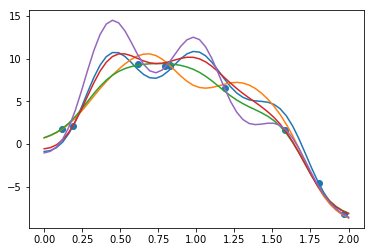

In [18]:
plt.scatter(x_10,t_10)
plt.plot(x1,np.dot(a1[0],fi))
plt.plot(x1,np.dot(a1[1],fi))
plt.plot(x1,np.dot(a1[2],fi))
plt.plot(x1,np.dot(a1[3],fi))
plt.plot(x1,np.dot(a1[4],fi))
plt.show()

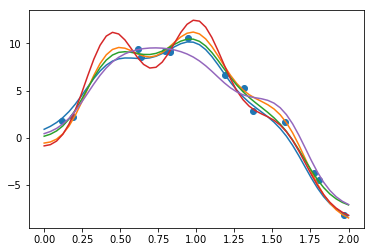

In [19]:
plt.scatter(x_15,t_15)
plt.plot(x1,np.dot(a2[0],fi))
plt.plot(x1,np.dot(a2[1],fi))
plt.plot(x1,np.dot(a2[2],fi))
plt.plot(x1,np.dot(a2[3],fi))
plt.plot(x1,np.dot(a2[4],fi))
plt.show()

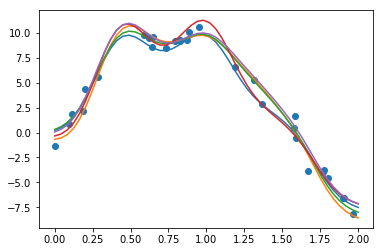

In [20]:
plt.scatter(x_30,t_30)
plt.plot(x1,np.dot(a3[0],fi))
plt.plot(x1,np.dot(a3[1],fi))
plt.plot(x1,np.dot(a3[2],fi))
plt.plot(x1,np.dot(a3[3],fi))
plt.plot(x1,np.dot(a3[4],fi))
plt.show()

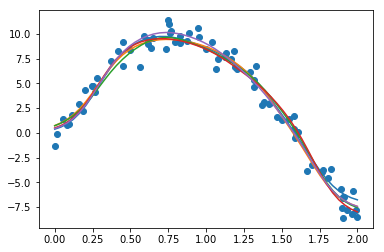

In [21]:
plt.scatter(x_80,t_80)
plt.plot(x1,np.dot(a4[0],fi))
plt.plot(x1,np.dot(a4[1],fi))
plt.plot(x1,np.dot(a4[2],fi))
plt.plot(x1,np.dot(a4[3],fi))
plt.plot(x1,np.dot(a4[4],fi))
plt.show()

In [22]:
mn_1 = np.dot(mn_10,fi_1)
sigma_t1 = 1+np.dot(np.dot(fi_1.transpose(),sn_10),fi_1)
w1 = np.dot(np.dot(inv(np.dot(fi_1,fi_1.transpose())),fi_1),mn_1)
mn_2 = np.dot(mn_15,fi_2)
sigma_t2 = 1+np.dot(np.dot(fi_2.transpose(),sn_15),fi_2)
w2 = np.dot(np.dot(inv(np.dot(fi_2,fi_2.transpose())),fi_2),mn_2)
mn_3 = np.dot(mn_30,fi_3)
sigma_t3 = 1+np.dot(np.dot(fi_3.transpose(),sn_30),fi_3)
w3 = np.dot(np.dot(inv(np.dot(fi_3,fi_3.transpose())),fi_3),mn_3)
mn_4 = np.dot(mn_80,fi_4)
sigma_t4 = 1+np.dot(np.dot(fi_4.transpose(),sn_80),fi_4)
w4 = np.dot(np.dot(inv(np.dot(fi_4,fi_4.transpose())),fi_4),mn_4)

In [23]:
#standard deviation
m1 = np.sqrt(np.diag(sigma_t1))
m2 = np.sqrt(np.diag(sigma_t2))
m3 = np.sqrt(np.diag(sigma_t3))
m4 = np.sqrt(np.diag(sigma_t4))

In [24]:
#upper and lower bound
up1 = mn_1+m1
up2 = mn_2+m2
up3 = mn_3+m3
up4 = mn_4+m4
d1 = mn_1-m1
d2 = mn_2-m2
d3 = mn_3-m3
d4 = mn_4-m4

In [25]:
w1_up = np.dot(np.dot(inv(np.dot(fi_1,fi_1.transpose())),fi_1),(up1))
w1_d = np.dot(np.dot(inv(np.dot(fi_1,fi_1.transpose())),fi_1),(d1))
w2_up = np.dot(np.dot(inv(np.dot(fi_2,fi_2.transpose())),fi_2),(up2))
w2_d = np.dot(np.dot(inv(np.dot(fi_2,fi_2.transpose())),fi_2),(d2))
w3_up = np.dot(np.dot(inv(np.dot(fi_3,fi_3.transpose())),fi_3),(up3))
w3_d = np.dot(np.dot(inv(np.dot(fi_3,fi_3.transpose())),fi_3),(d3))
w4_up = np.dot(np.dot(inv(np.dot(fi_4,fi_4.transpose())),fi_4),(up4))
w4_d = np.dot(np.dot(inv(np.dot(fi_4,fi_4.transpose())),fi_4),(d4))

In [26]:
# for x-label
x1 = np.array(np.linspace(0,2,50))
fi1 = []
fi = []
for j in range(7):
    for i in range(50):
        fi_0 = sigmoid((x1[i]-(2*j)/7)/0.1)
        fi1.append(fi_0)
    fi.append(fi1)
    fi1 = []

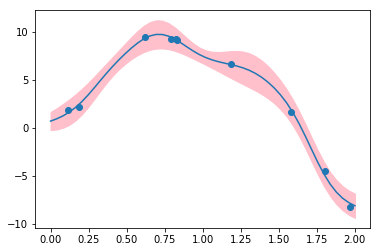

In [27]:
plt.plot(x1,np.dot(w1,fi))
plt.fill_between(x1,np.dot(w1_up,fi),np.dot(w1_d,fi),color='pink')
plt.scatter(x_10,t_10)
plt.show()

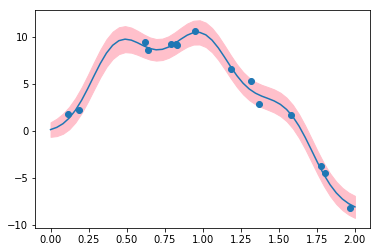

In [28]:
plt.plot(x1,np.dot(w2,fi))
plt.fill_between(x1,np.dot(w2_up,fi),np.dot(w2_d,fi),color='pink')
plt.scatter(x_15,t_15)
plt.show()

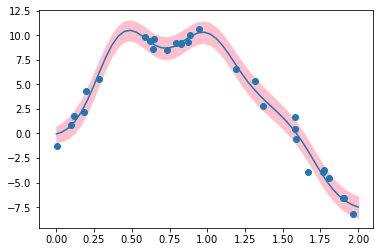

In [29]:
plt.plot(x1,np.dot(w3,fi))
plt.fill_between(x1,np.dot(w3_up,fi),np.dot(w3_d,fi),color='pink')
plt.scatter(x_30,t_30)
plt.show()

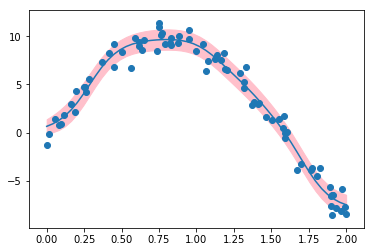

In [30]:
plt.fill_between(x1,np.dot(w4_up,fi),np.dot(w4_d,fi),color='pink')
plt.scatter(x_80,t_80)
plt.plot(x1,np.dot(w4,fi))
plt.show()